In [1]:
import pandas as pd
import numpy as np

## Explore Data

In [3]:
data=pd.read_csv(r"E:\data_projects\Heart Failure Prediction Dataset\heart.csv")

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.shape

(918, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

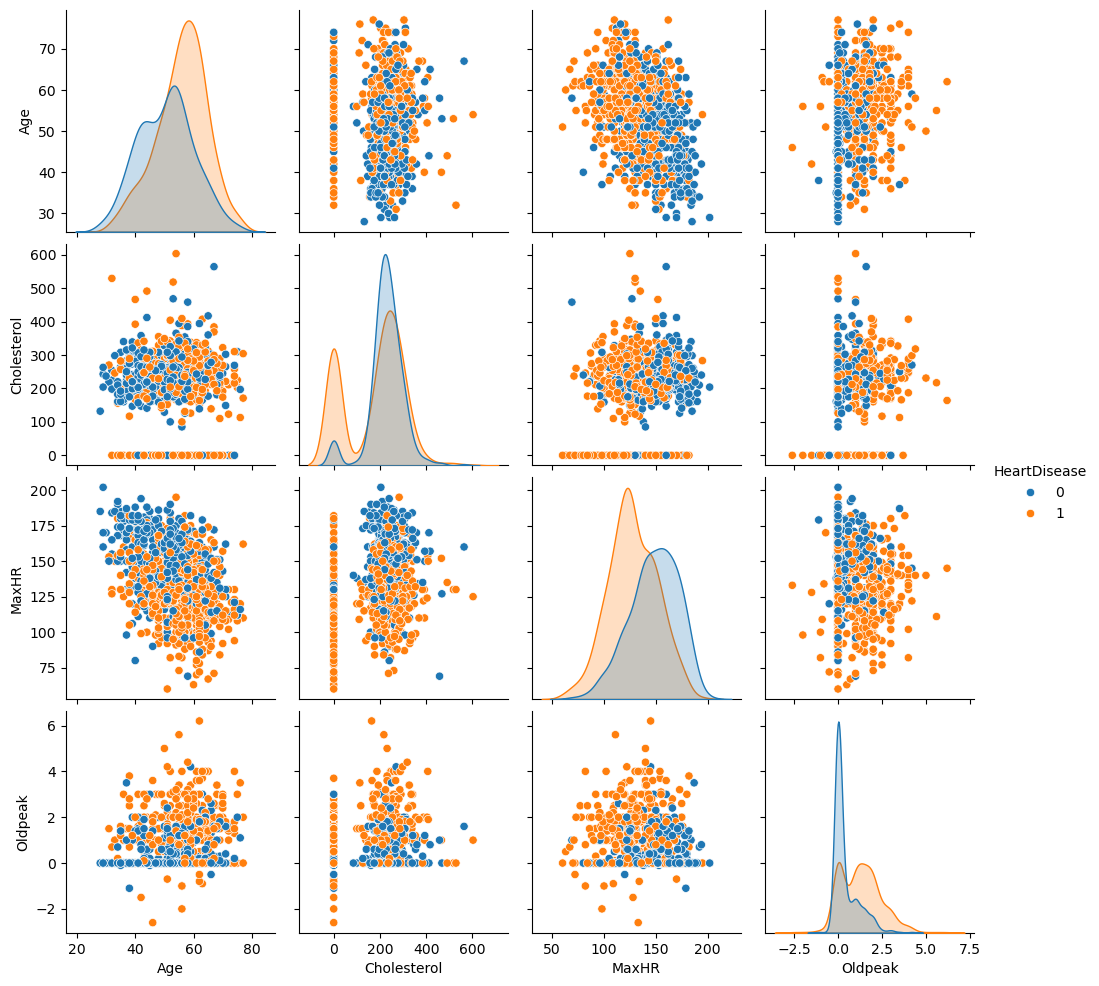

In [12]:
sns.pairplot(data, vars=["Age", "Cholesterol", "MaxHR", "Oldpeak"], hue="HeartDisease")
plt.show()

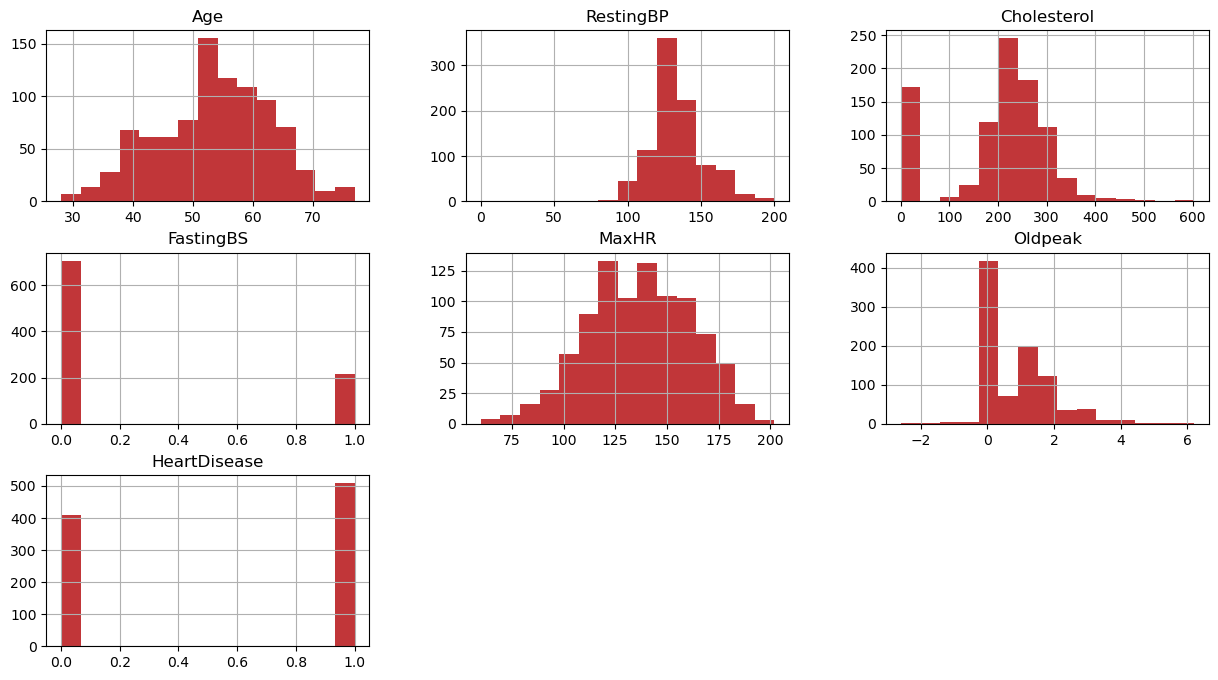

In [13]:
sns.set_palette("RdBu")
data.hist(bins=15,figsize=(15,8))
plt.show()

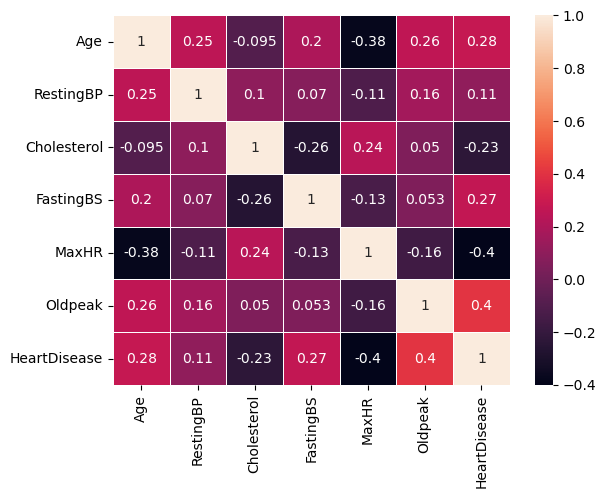

In [14]:
sns.set_palette("coolwarm")
corr = data.corr(numeric_only=True)
sns.heatmap(corr,annot=True,linewidth=0.5)
plt.show()

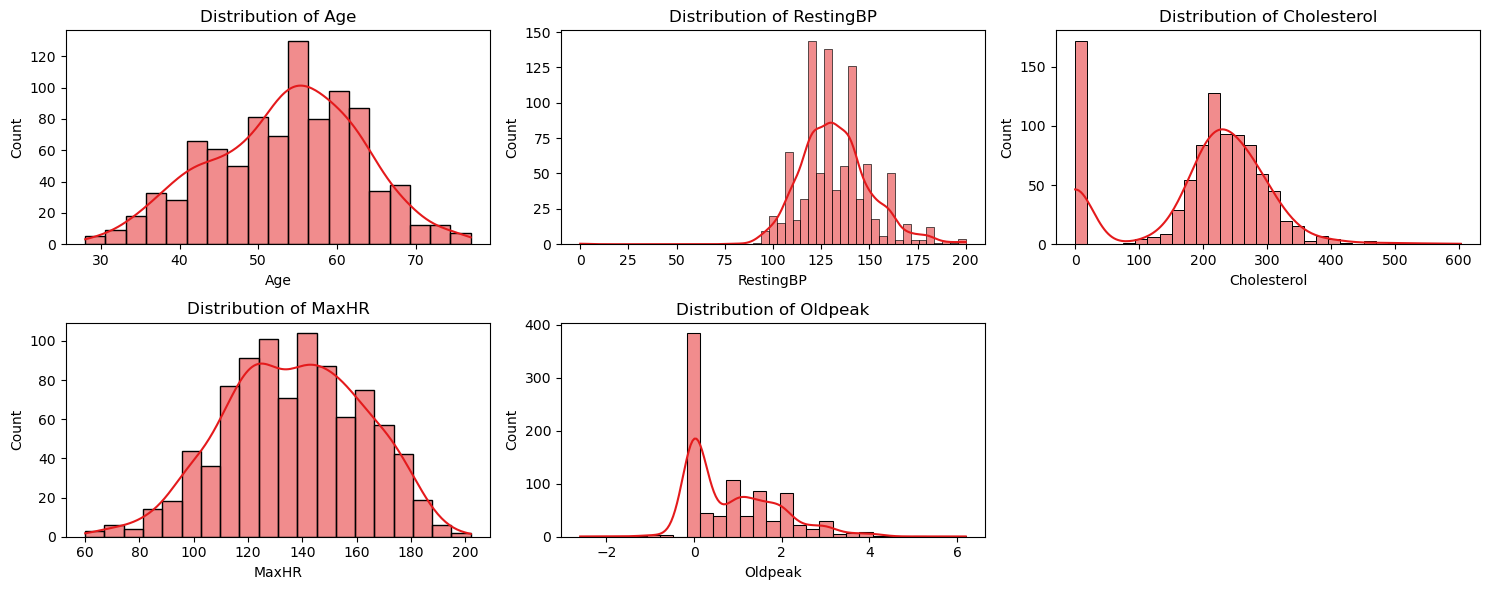

In [15]:
numeric_columns=["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]
sns.set_palette("Set1")
plt.figure(figsize=(15, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

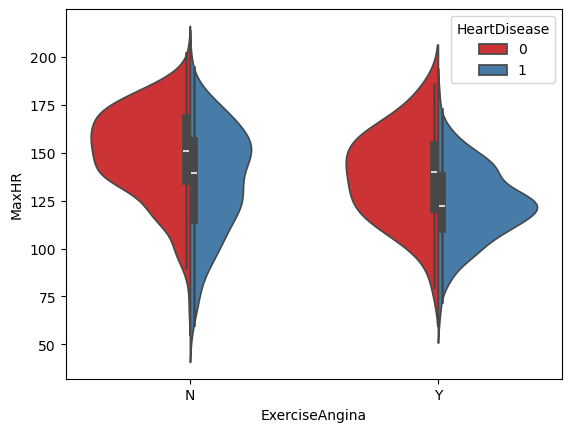

In [16]:
sns.set_palette("Set1")
sns.violinplot(data=data, x="ExerciseAngina", y="MaxHR", hue="HeartDisease", split=True)
plt.show()

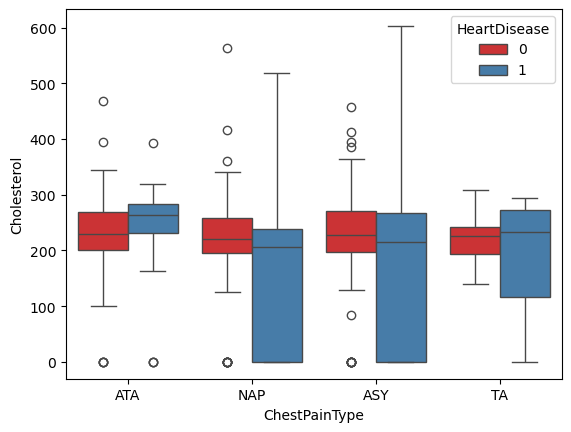

In [17]:
sns.set_palette("Set1")
sns.boxplot(data=data, x="ChestPainType", y="Cholesterol", hue="HeartDisease")
plt.show()

In [18]:
from sklearn.preprocessing import OrdinalEncoder

## Data Transformation

In [20]:
categorical_columns=data.select_dtypes("object")
for col in categorical_columns:
    print(data[col].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [21]:
onehot_cols = ["Sex", "ExerciseAngina", "ChestPainType", "RestingECG"]
ordinal_cols = ["ST_Slope"]

data = pd.get_dummies(data, columns=onehot_cols, drop_first=True)
ordinal_encoder = OrdinalEncoder(categories=[["Down", "Flat", "Up"]])
data[ordinal_cols] = ordinal_encoder.fit_transform(data[ordinal_cols])

In [22]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,0.0,2.0,0,True,False,True,False,False,True,False
1,49,160,180,0,156,1.0,1.0,1,False,False,False,True,False,True,False
2,37,130,283,0,98,0.0,2.0,0,True,False,True,False,False,False,True
3,48,138,214,0,108,1.5,1.0,1,False,True,False,False,False,True,False
4,54,150,195,0,122,0.0,2.0,0,True,False,False,True,False,True,False


In [23]:
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

In [24]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,0.0,2.0,0,1,0,1,0,0,1,0
1,49,160,180,0,156,1.0,1.0,1,0,0,0,1,0,1,0
2,37,130,283,0,98,0.0,2.0,0,1,0,1,0,0,0,1
3,48,138,214,0,108,1.5,1.0,1,0,1,0,0,0,1,0
4,54,150,195,0,122,0.0,2.0,0,1,0,0,1,0,1,0


In [25]:
data.dtypes

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
ST_Slope             float64
HeartDisease           int64
Sex_M                  int32
ExerciseAngina_Y       int32
ChestPainType_ATA      int32
ChestPainType_NAP      int32
ChestPainType_TA       int32
RestingECG_Normal      int32
RestingECG_ST          int32
dtype: object

In [26]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings

## Modeling

In [28]:
y = data['HeartDisease']  
X = data.drop(columns=['HeartDisease'])  

In [29]:
warnings.simplefilter(action='ignore', category=FutureWarning)
#  Feature Engineering
X['age_maxhr_ratio'] = X['Age'] / (X['MaxHR'] + 1)
X['cholesterol_log'] = np.log1p(X['Cholesterol'])
X['bp_oldpeak_product'] = X['RestingBP'] * X['Oldpeak']
X['chol_bp_ratio'] = X['Cholesterol'] / (X['RestingBP'] + 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [31]:
# Impute Missing Values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [32]:
#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [33]:
def try_model(model):
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    print(f"\n Model: {model.__class__.__name__}")
    print(f" Accuracy: {accuracy_score(y_test, pred):.4f}")
    print(f" Precision: {precision_score(y_test, pred):.4f}")
    print(f" Recall: {recall_score(y_test, pred):.4f}")
    print(f" F1 Score: {f1_score(y_test, pred):.4f}")
    print("\n Classification Report:\n", classification_report(y_test, pred))

#### XGBClassifier Model

In [35]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.7,
    eval_metric='logloss',
    random_state=42
)
try_model(xgb)


 Model: XGBClassifier
 Accuracy: 0.8913
 Precision: 0.9100
 Recall: 0.8922
 F1 Score: 0.9010

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        82
           1       0.91      0.89      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



#### SVC Model

In [37]:
svc = SVC(
    probability=True,
    kernel='rbf',
    C=10,
    gamma=0.1,
    class_weight='balanced',
    random_state=42
)
try_model(svc)


 Model: SVC
 Accuracy: 0.8804
 Precision: 0.8846
 Recall: 0.9020
 F1 Score: 0.8932

 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



#### Random Forest Classifier Model

In [39]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)
try_model(rf)


 Model: RandomForestClassifier
 Accuracy: 0.9076
 Precision: 0.9126
 Recall: 0.9216
 F1 Score: 0.9171

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90        82
           1       0.91      0.92      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



#### KNeighbors Classifier Model

In [41]:
knn = KNeighborsClassifier(
    n_neighbors=5,      
    weights='uniform',   
    metric='minkowski',  
    p=2                  
)
try_model(knn)


 Model: KNeighborsClassifier
 Accuracy: 0.8967
 Precision: 0.9029
 Recall: 0.9118
 F1 Score: 0.9073

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88        82
           1       0.90      0.91      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184

